# Notebook 03: Fundamentos de k-means

En este notebook se va a implementar el algoritmo de clustering K-Means. En la primera parte se explica la implementación manual del algoritmo y luego se muestra como realizar los cálculos de forma sencilla con la librería sklearn.

In [1]:
import numpy as np
import tensorflow as tf # Solamente lo utilizamos para descargar los datos
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
d1 = np.random.randn(20, 2) + 2
d2 = np.random.randn(20, 2) - 3
d3 = np.random.randn(20, 2)
d3[:, 0] = d3[:, 0] + 4
d3[:, 1] = d3[:, 1] - 4

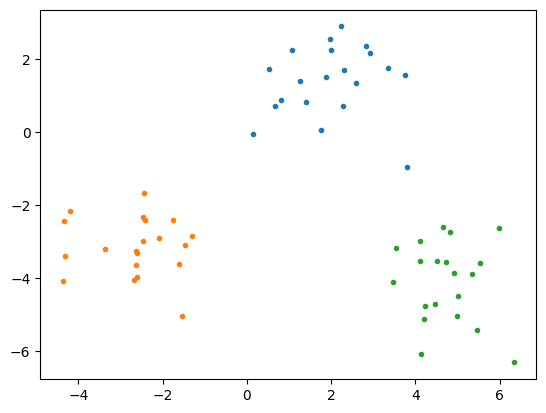

In [ ]:
plt.plot(d1[:, 0], d1[:, 1], '.')
plt.plot(d2[:, 0], d2[:, 1], '.')
plt.plot(d3[:, 0], d3[:, 1], '.')
plt.show()

In [ ]:
datos = np.concatenate((d1, d2, d3), axis=0)
datos = datos[np.random.permutation(len(datos))]

## Implementación manual del algoritmo

In [ ]:
K = 3

In [ ]:
# Inicializar los centroides
# Se seleccionan puntos aleatorios del conjunto de datos
i_centroides = np.random.choice(len(datos), K, replace=False) # NO cogemos puntos repetidos
centroides = datos[i_centroides]
centroides_old = np.zeros_like(centroides)

# While no se cumpla la condicion de parada do
# Condicion de parada: Que en una iteración del algoritmo no se modifique ningún centroide
while not (centroides == centroides_old).all():
    centroides_old = centroides

    # Asignar cada dato xi al centroide más cercano
    matriz_distancias = euclidean_distances(datos, centroides) # (D, K)
    clusters = np.argmin(matriz_distancias, axis=1) # (D)

    # Actualizar los centroides según cierta operación
    # Operación: Actualizar el centroide por el promedio de los puntos del cluster
    centroides = np.zeros_like(centroides)
    for c in range(K):
      centroides[c] = datos[clusters == c].mean(axis=0)

In [ ]:
clusters

array([2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1,
       2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0,
       0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2])

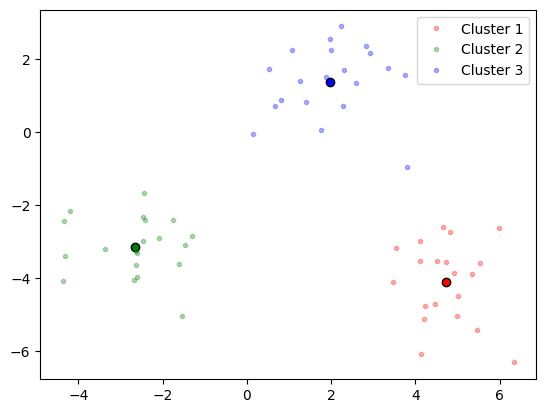

In [ ]:
color = ["red", "green", "blue"]
for c in np.unique(clusters):
  plt.plot(datos[clusters == c, 0], datos[clusters == c, 1], '.', color=color[c], label="Cluster "+str(c+1), alpha=0.3)
  plt.scatter([centroides[c, 0]], [centroides[c, 1]], color=color[c], edgecolors="black")
plt.legend()
plt.show()

## K-Means usando la librería Sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [2]:
from sklearn.cluster import KMeans

In [ ]:
K = 3

kmeans = KMeans(n_clusters = K, init = 'random', n_init = 10)
kmeans.fit(datos)

In [ ]:
clusters = kmeans.predict(datos)
clusters

array([1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2,
       1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0,
       0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1], dtype=int32)

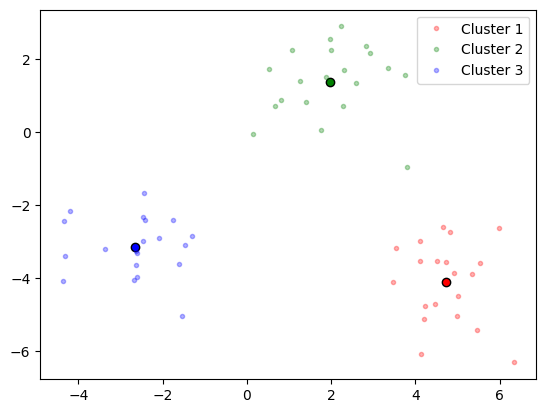

In [ ]:
color = ["red", "green", "blue"]
for c in np.unique(clusters):
  plt.plot(datos[clusters == c, 0], datos[clusters == c, 1], '.', color=color[c], label="Cluster "+str(c+1), alpha=0.3)
  plt.scatter([kmeans.cluster_centers_[c, 0]], [kmeans.cluster_centers_[c, 1]], color=color[c], edgecolors="black")
plt.legend()
plt.show()

### Frontera de clusterización con K-Means

In [ ]:
margen = 0.5
XX, YY = np.meshgrid(np.linspace(datos.min(axis=0)[0] - margen, datos.max(axis=0)[0] + margen, 100), np.linspace(datos.min(axis=0)[1] - margen, datos.max(axis=0)[1] + margen, 100))
points = np.concatenate([XX.reshape(-1, 1), YY.reshape(-1, 1)], axis=1)
labels = kmeans.predict(points)
labels = labels.reshape(XX.shape)

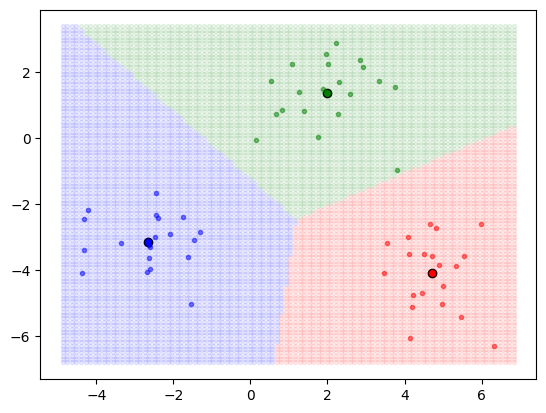

In [ ]:
color = ["red", "green", "blue"]
for c in np.unique(clusters):
  plt.plot(datos[clusters == c, 0], datos[clusters == c, 1], '.', color=color[c], label="Cluster "+str(c+1), alpha=0.5)
  plt.scatter([kmeans.cluster_centers_[c, 0]], [kmeans.cluster_centers_[c, 1]], color=color[c], edgecolors="black")
  plt.scatter(XX[labels == c], YY[labels == c], color=color[c], marker='.', alpha=0.08)
plt.show()

# K-Means para MNIST

Vamos a descargar el dataset de MNIST para hacer clustering con los datos de MNIST:

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Dividimos entre 255 para que todos los atributos de la imagen estén entre 0 y 1.

In [4]:
x_train = x_train / 255
x_test = x_test / 255

Restamos ahora la media para destacar como positivos los píxeles de la clase y el resto con valores negativos.

In [5]:
x_train = x_train - x_train.mean(axis=0)
x_test = x_test - x_train.mean(axis=0)

Veamos el aspecto de nuestros datos una vez más:

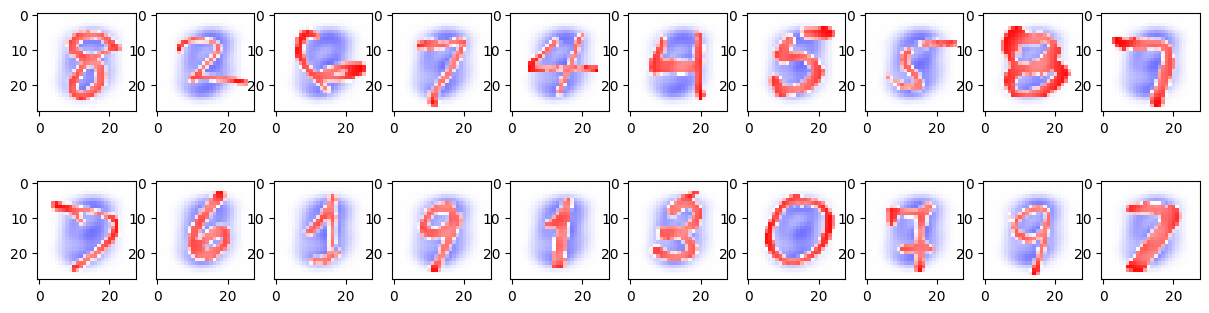

In [6]:
plt.figure(figsize=(15,4))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.imshow(x_train[np.random.randint(60000)], cmap="bwr", vmin=-1, vmax=1)
plt.show()

In [7]:
datos = x_train.reshape(x_train.shape[0], -1)
datos.shape

(60000, 784)

Para agilizar los cálculos (60000 imágenes tarda un buen rato) vamos a reducir el número de imágenes a 10000.

In [8]:
datos = datos[:10000]
datos.shape

(10000, 784)

Empezamos con el algoritmo. Recuerda definir $K$.

- Probamos con K = 10, el número de clases

In [9]:
K = 10

kmeans = KMeans(n_clusters = K, init = 'random', n_init = 10).fit(datos)
clusters = kmeans.predict(datos)
clusters

array([2, 3, 4, ..., 5, 8, 6], dtype=int32)

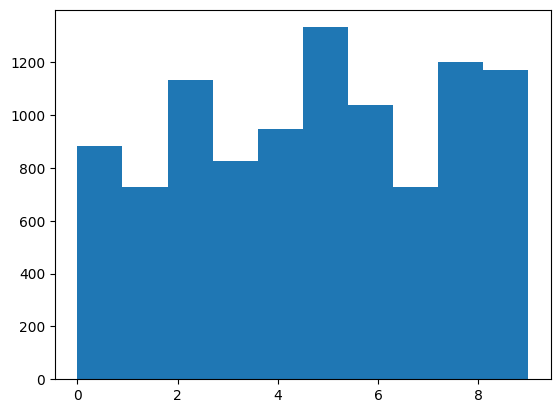

In [10]:
plt.hist(clusters, bins=K)
plt.show()

<ipython-input-24-78b89f907c4e>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, N+1, 1)


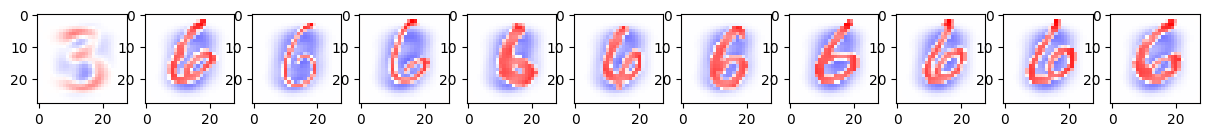

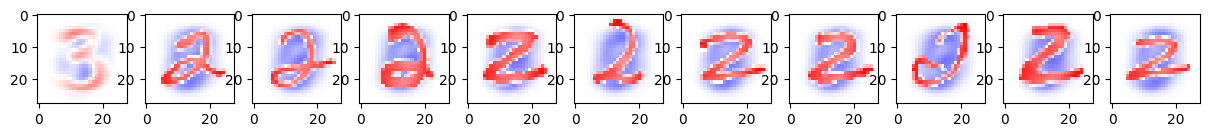

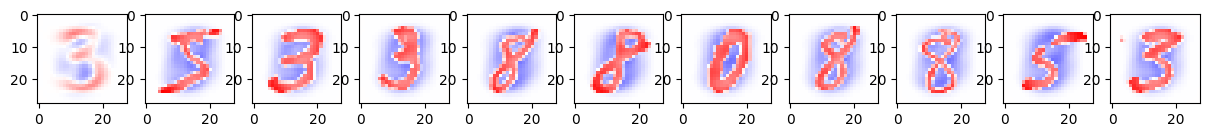

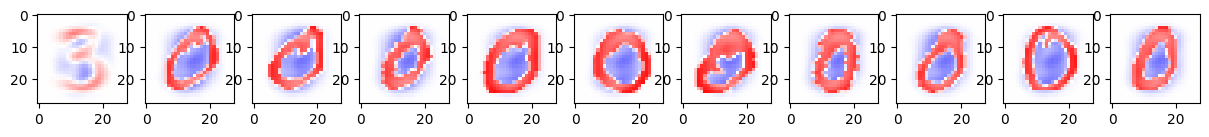

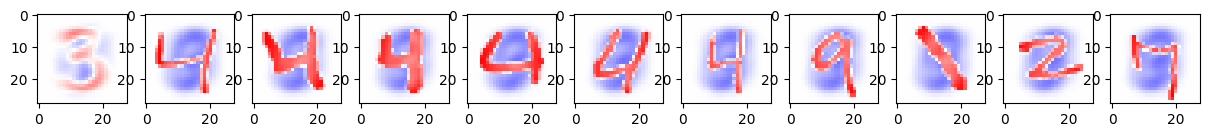

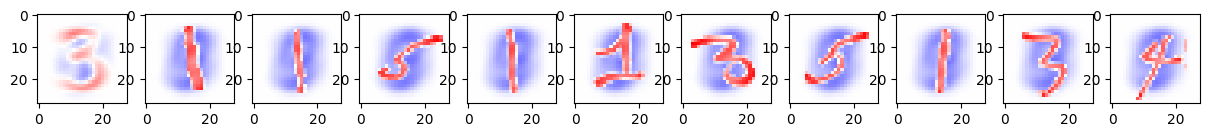

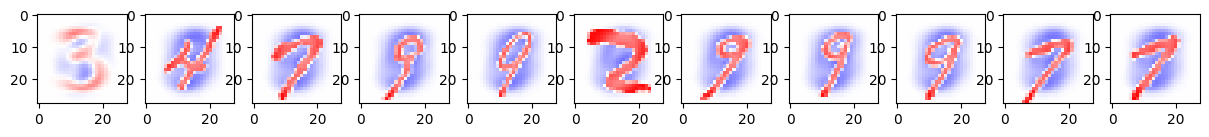

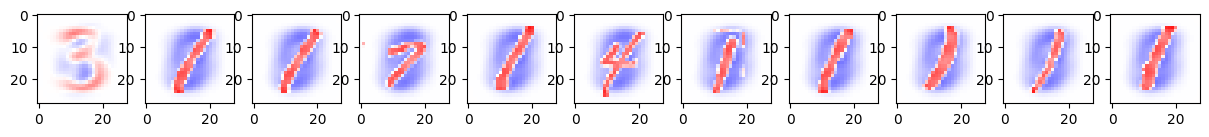

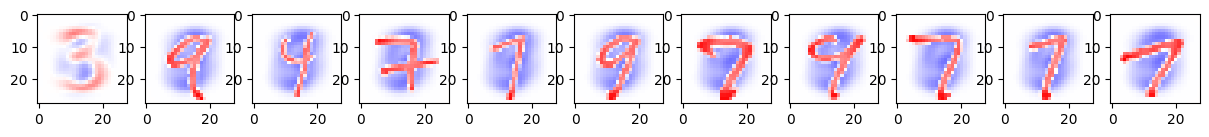

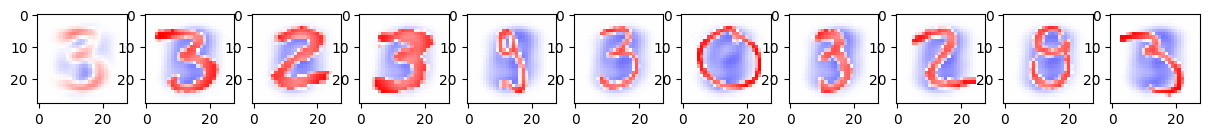

In [24]:
N = 10
for c in np.unique(clusters):
  indices = np.where(clusters == c)[0]
  plt.figure(figsize=(15,4))
  plt.title("Cluster " + str(c))
  plt.subplot(1, N+1, 1)
  plt.imshow(center.reshape(28,28), cmap="bwr", vmin=-1, vmax=1)
  for i in range(N):
    plt.subplot(1,N+1,i+2)
    plt.imshow(x_train[indices][i], cmap="bwr", vmin=-1, vmax=1)
  plt.show()

**Discusión de los resultados**

No tiene sentido seleccionar un $K$ igual al número de clases. Estamos en clustering, no en aprendizaje supervisado!

Sin embargo, en la celda anterior estamos pintando los 10 primeros elementos de cada cluster. En lugar de eso, podemos encontrar los 10 más cercanos a los centroides para ver qué, en realidad, sí está funcionando correctamente.

In [13]:
matriz_distancias = euclidean_distances(datos, kmeans.cluster_centers_)
matriz_distancias.shape

(10000, 10)

(884,) (884, 784)


<ipython-input-23-485cd2a8db33>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,N+1,1)


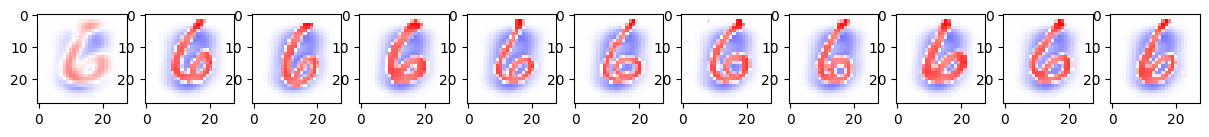

(730,) (730, 784)


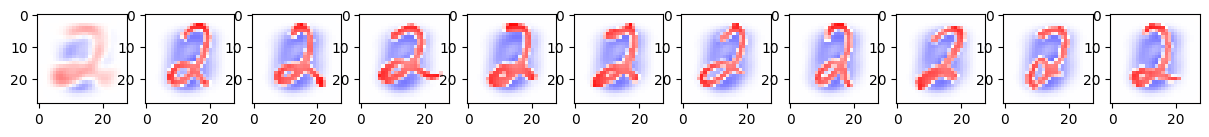

(1135,) (1135, 784)


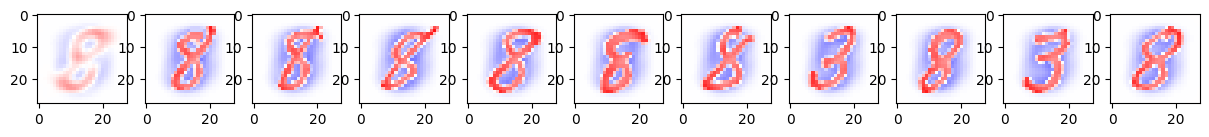

(828,) (828, 784)


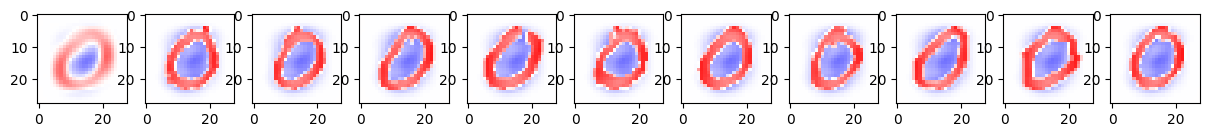

(946,) (946, 784)


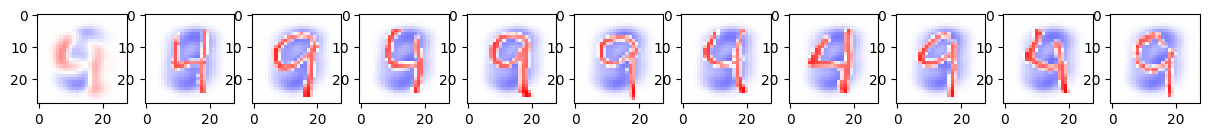

(1333,) (1333, 784)


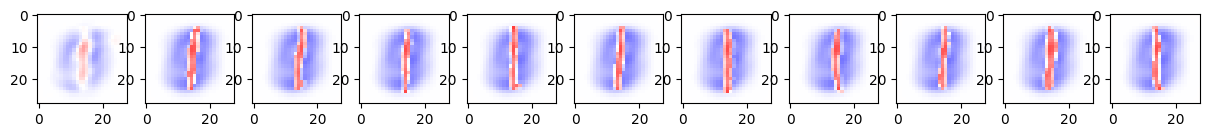

(1038,) (1038, 784)


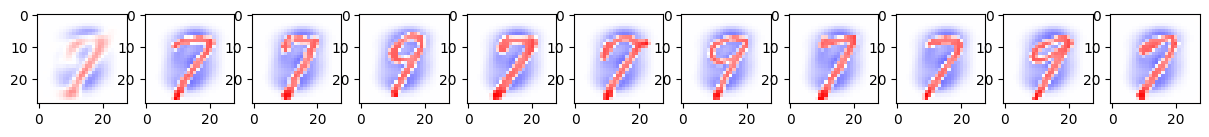

(730,) (730, 784)


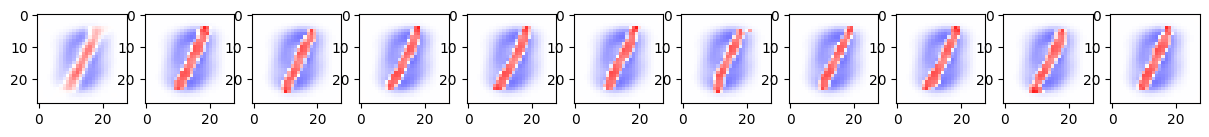

(1203,) (1203, 784)


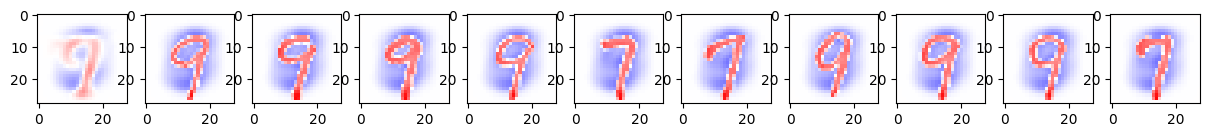

(1173,) (1173, 784)


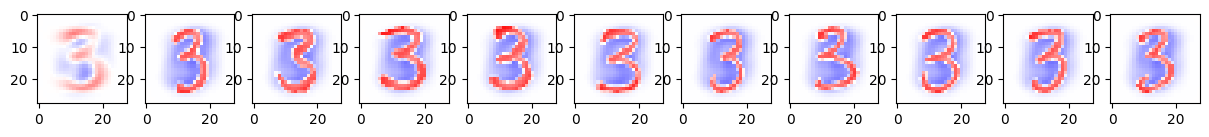

In [23]:
N = 10
for c in range(K):
  # distancias al centroide c
  distancias = matriz_distancias[clusters==c, c]
  datos_cluster = datos[clusters==c]
  # nos quedamos con las N primeras distancias
  umbral = np.sort(distancias)[N]
  indices = np.where(distancias < umbral)[0]
  plt.figure(figsize=(15,4))
  plt.title("Cluster " + str(c))
  plt.subplot(1,N+1,1)
  plt.imshow(kmeans.cluster_centers_[c].reshape(28,28), cmap="bwr", vmin=-1, vmax=1)
  for i in range(10):
    plt.subplot(1,N+1,i+2)
    plt.imshow(datos_cluster.reshape(-1, 28, 28)[indices][i], cmap="bwr", vmin=-1, vmax=1)
  plt.show()

Como podemos ver, K-Means también funciona correctamente cuando miramos cerca de los centroides.

**Ejercicio**: Busca un K razonable y cuéntanos qué conclusiones sacas.

In [ ]:
K = 30

kmeans = KMeans(n_clusters = K, init = 'random', n_init = 10).fit(datos)
clusters = kmeans.predict(datos)
clusters

array([12, 17,  7, ..., 26,  2,  9], dtype=int32)

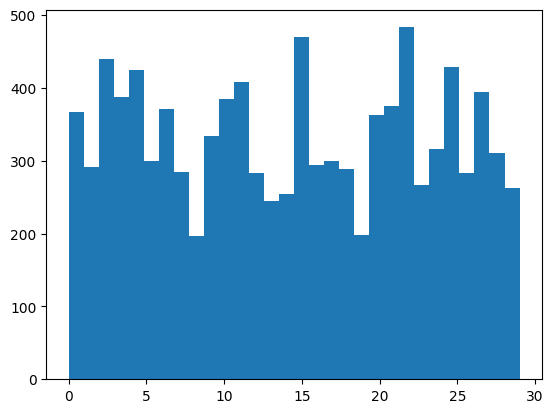

In [ ]:
plt.hist(clusters, bins=K)
plt.show()

<ipython-input-27-d3f7e31f020e>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,10,i+1)


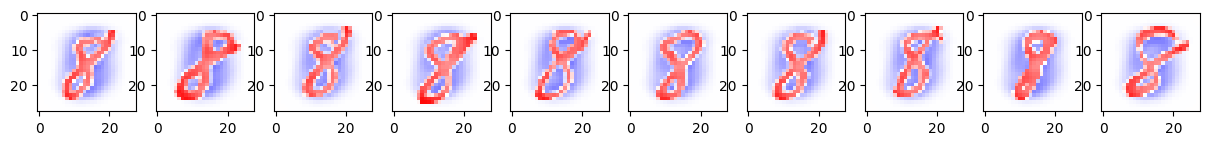

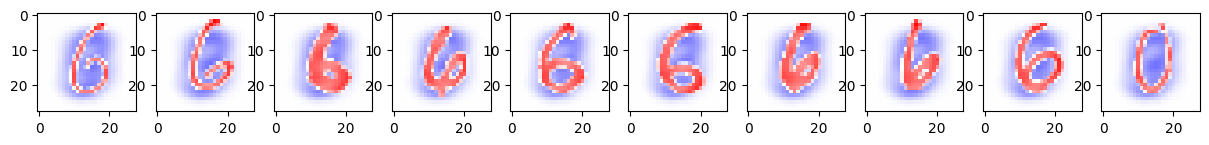

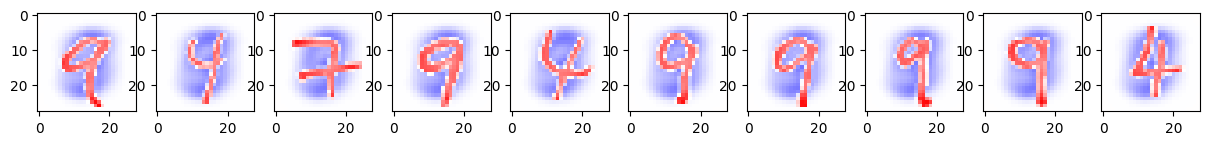

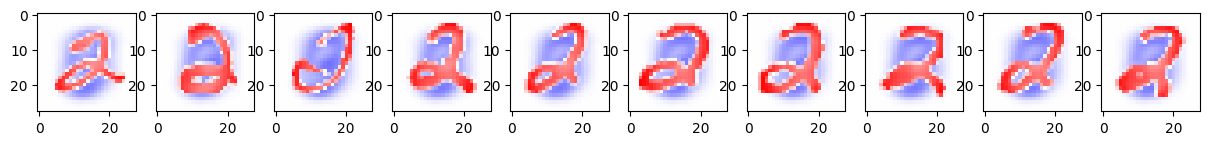

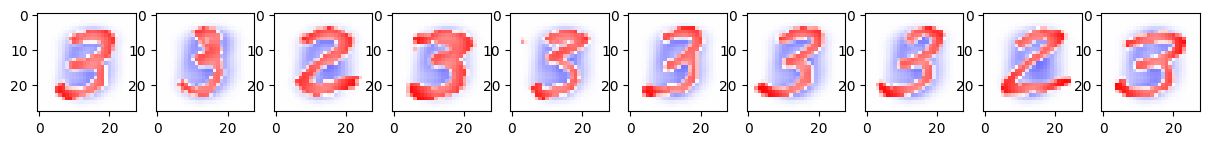

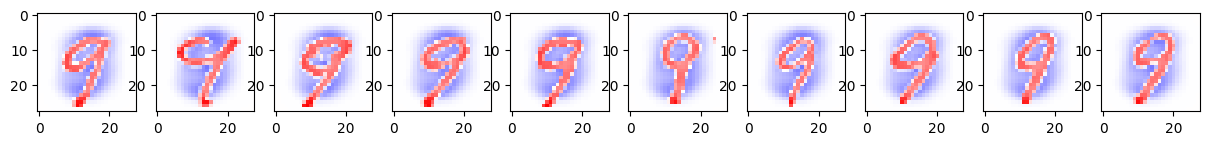

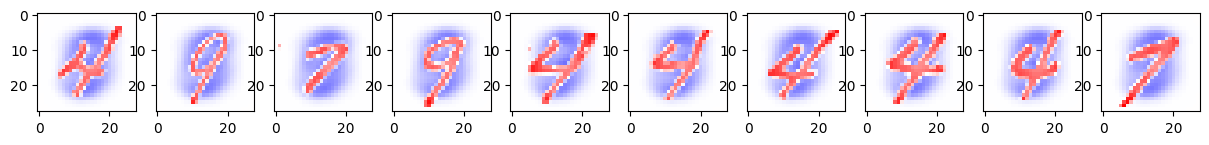

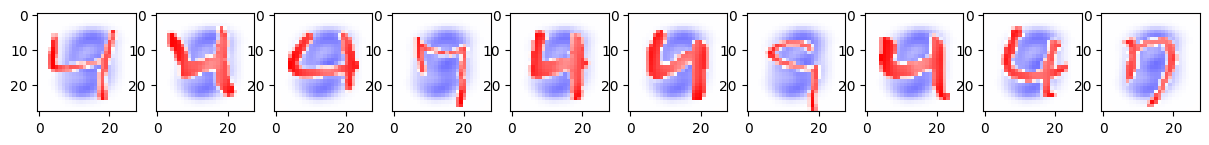

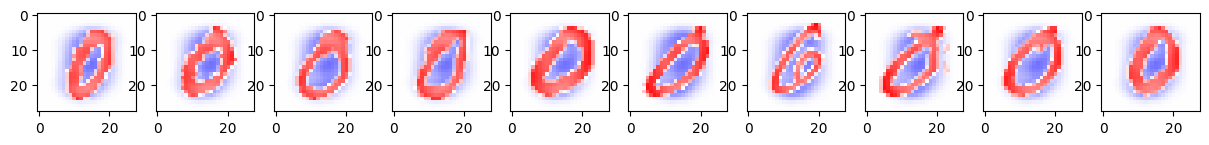

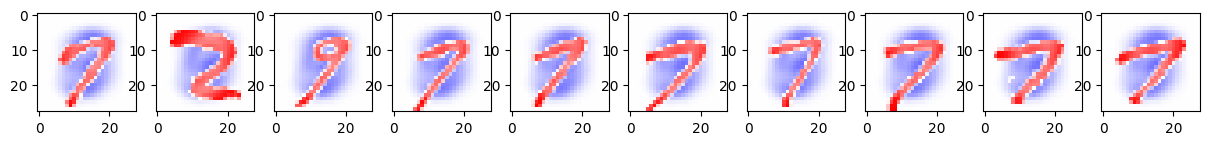

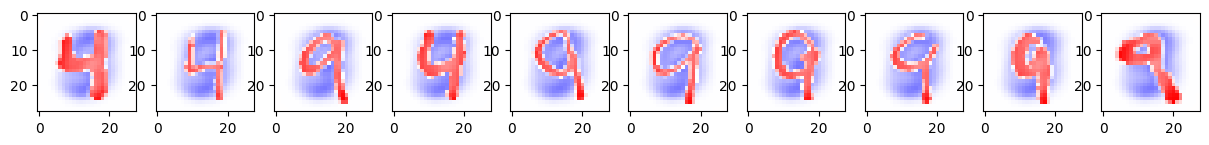

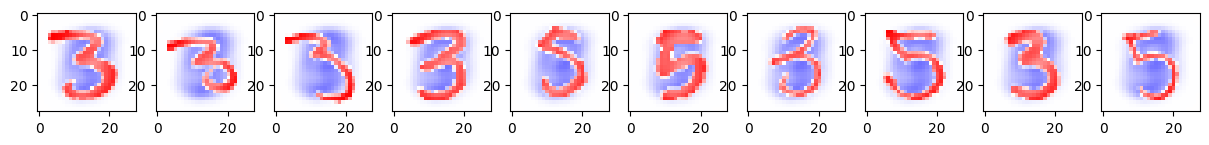

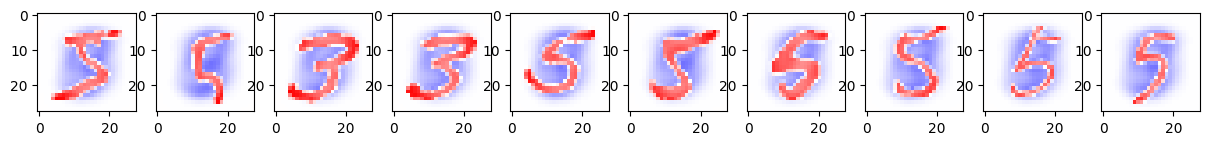

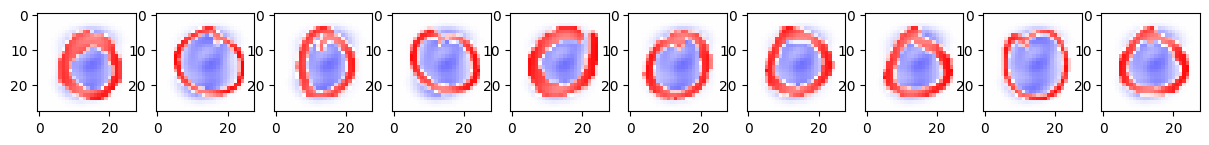

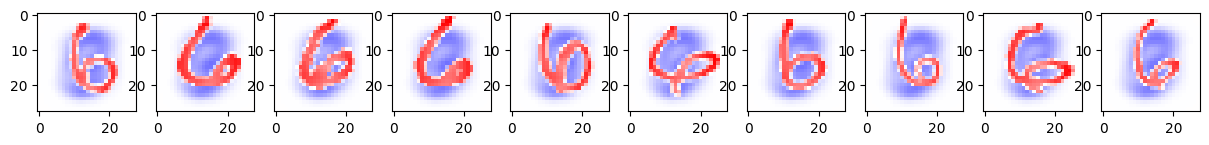

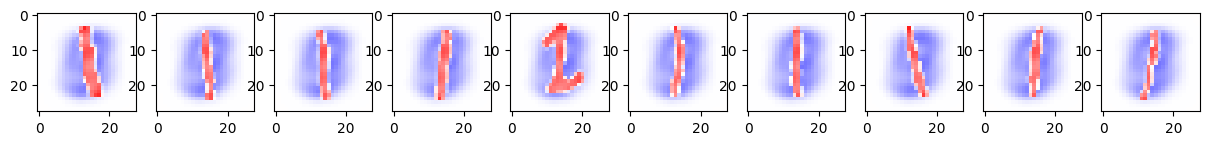

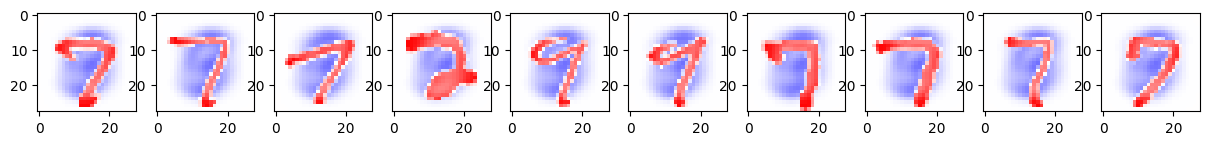

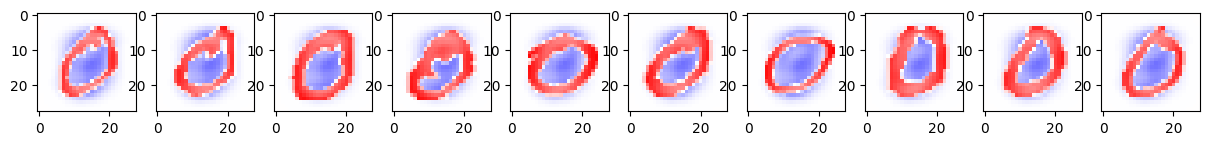

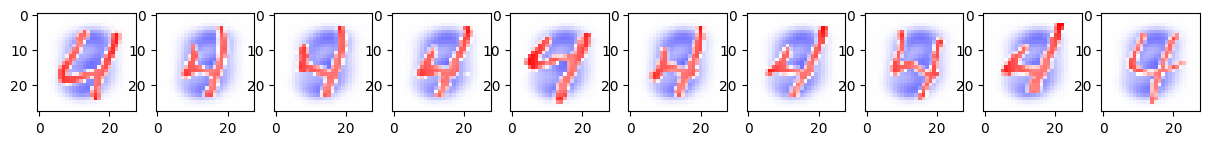

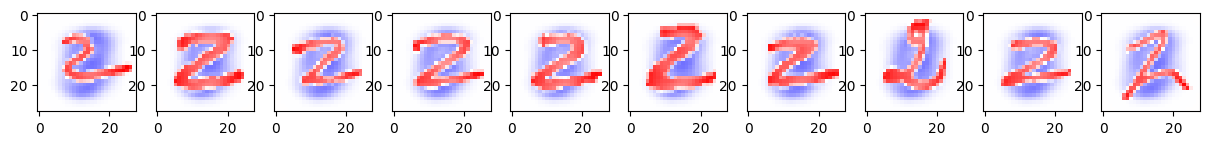

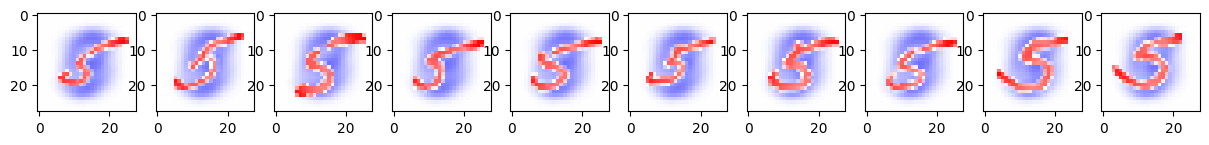

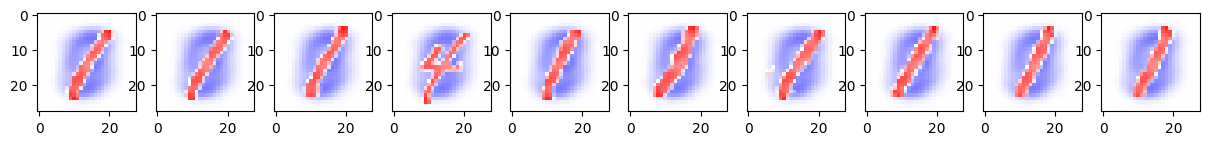

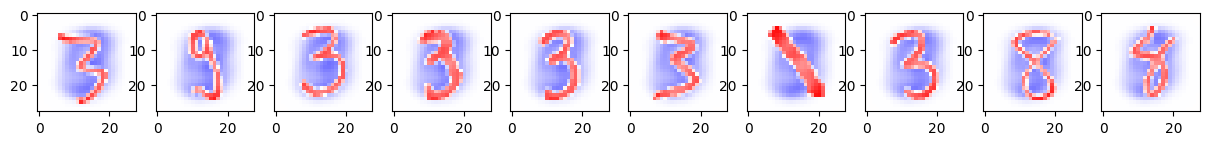

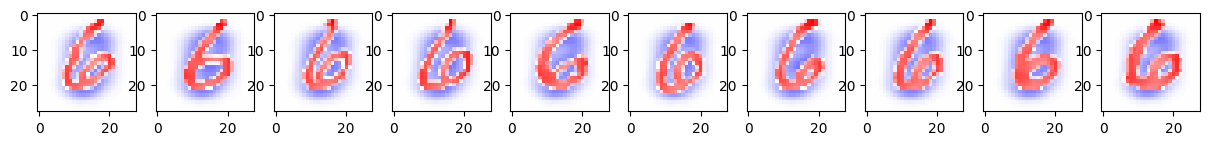

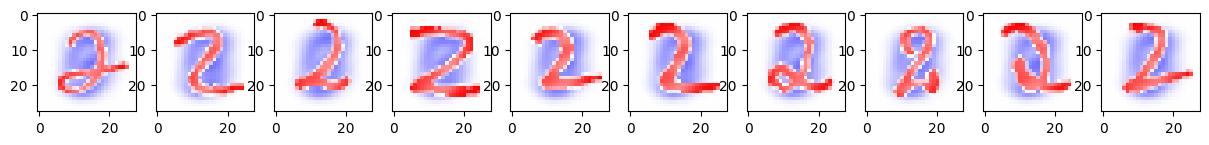

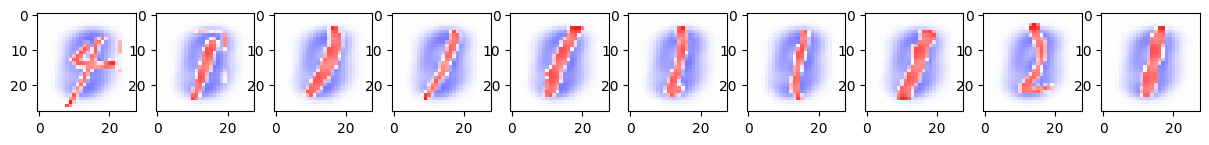

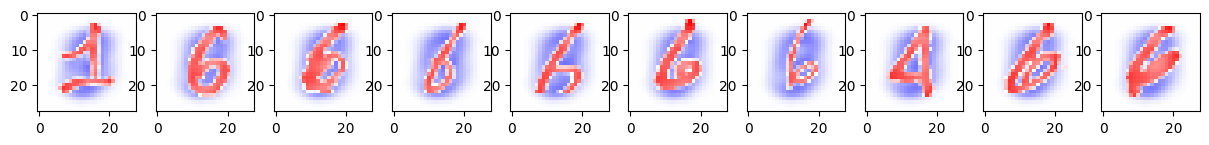

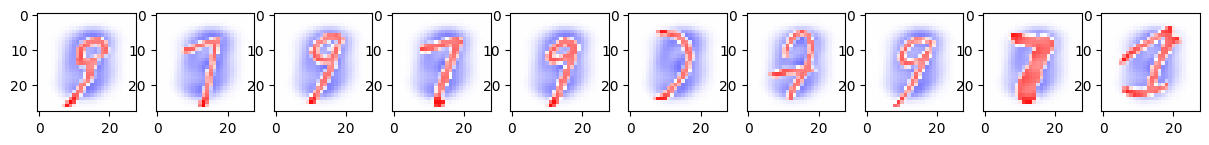

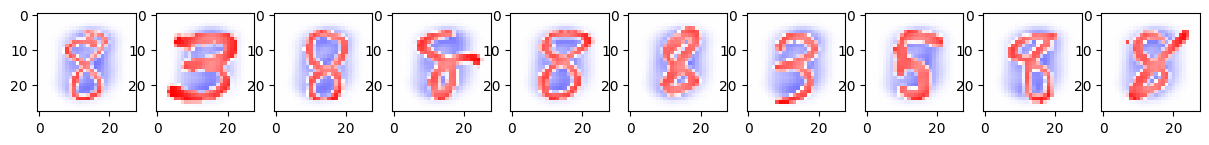

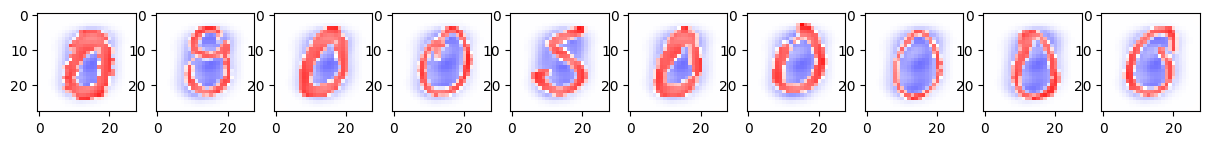

In [ ]:
for c in np.unique(clusters):
  indices = np.where(clusters == c)[0]
  if len(indices) > 10:
    plt.figure(figsize=(15,4))
    plt.title("Cluster " + str(c))
    for i in range(10):
      plt.subplot(1,10,i+1)
      plt.imshow(x_train[indices][i], cmap="bwr", vmin=-1, vmax=1)
    plt.show()

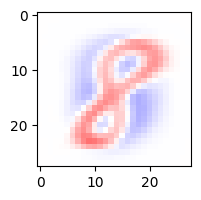

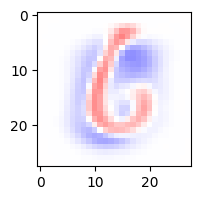

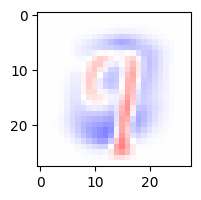

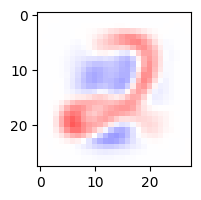

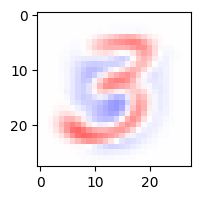

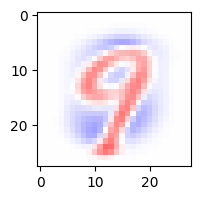

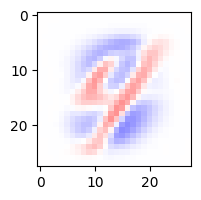

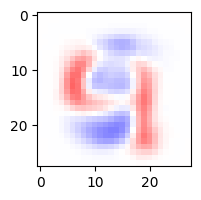

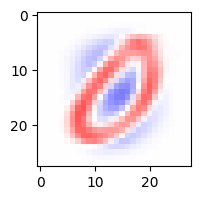

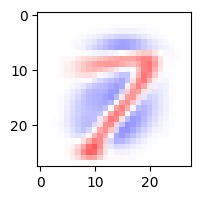

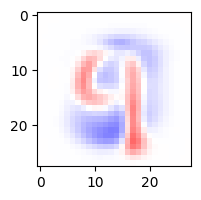

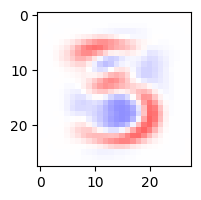

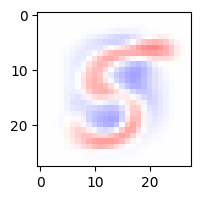

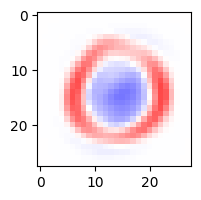

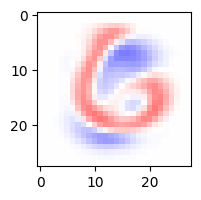

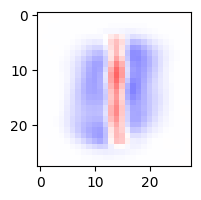

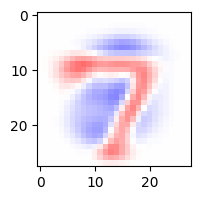

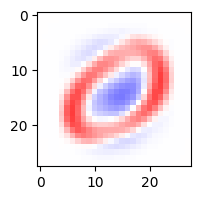

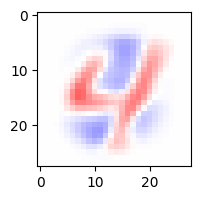

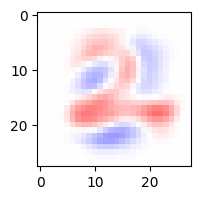

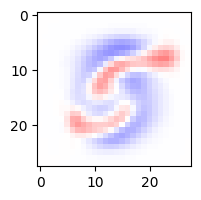

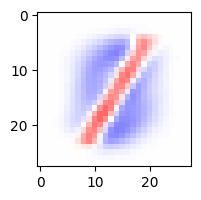

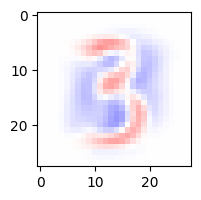

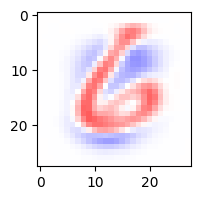

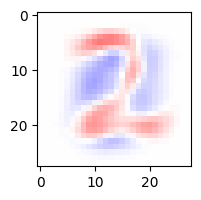

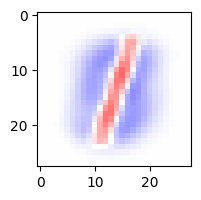

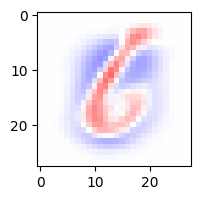

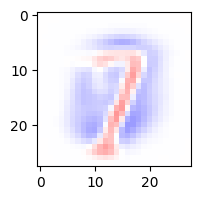

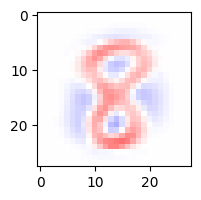

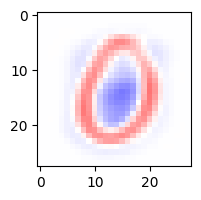

In [ ]:
for center in kmeans.cluster_centers_:
  plt.figure(figsize=(2,2))
  plt.imshow(center.reshape(28,28), cmap="bwr", vmin=-1, vmax=1)
  plt.show()

# K-Means para Breast Cancer

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [ ]:
breastCancer = load_breast_cancer()
print(breastCancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
datos = pd.DataFrame(breastCancer.data, columns=breastCancer.feature_names)
datos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Preprocesado

In [ ]:
medias = datos.mean()
stds = datos.std()
datos = (datos - medias) / stds
datos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


## Ejecución

In [ ]:
K = 10

kmeans = KMeans(n_clusters = K, init = 'random', n_init = 10).fit(datos)
clusters = kmeans.predict(datos)
clusters

array([4, 0, 4, 9, 0, 9, 0, 9, 9, 9, 5, 9, 4, 5, 9, 9, 0, 9, 6, 8, 8, 7,
       9, 6, 0, 4, 9, 0, 9, 0, 4, 9, 9, 0, 9, 0, 9, 2, 5, 9, 5, 9, 4, 9,
       8, 4, 7, 9, 8, 5, 2, 2, 2, 0, 5, 7, 0, 9, 2, 7, 7, 7, 9, 7, 9, 9,
       7, 2, 3, 2, 0, 3, 9, 8, 2, 0, 7, 4, 4, 8, 7, 9, 6, 4, 8, 0, 5, 0,
       5, 8, 5, 5, 2, 5, 9, 0, 7, 7, 8, 5, 5, 7, 5, 7, 7, 9, 7, 2, 4, 8,
       7, 7, 3, 7, 7, 8, 7, 9, 9, 0, 8, 0, 1, 8, 2, 2, 5, 0, 8, 0, 8, 0,
       0, 8, 0, 5, 5, 2, 4, 7, 2, 0, 7, 8, 2, 7, 9, 5, 8, 2, 7, 3, 3, 2,
       8, 8, 0, 5, 2, 2, 7, 0, 6, 7, 6, 2, 2, 0, 6, 2, 8, 5, 9, 7, 2, 2,
       3, 9, 2, 2, 6, 4, 0, 2, 8, 7, 0, 2, 7, 2, 3, 5, 5, 9, 9, 2, 9, 0,
       0, 9, 8, 0, 4, 9, 8, 8, 7, 0, 9, 2, 0, 2, 1, 3, 9, 9, 7, 5, 6, 6,
       8, 8, 7, 9, 2, 8, 2, 8, 5, 9, 9, 5, 5, 0, 7, 5, 6, 0, 5, 0, 2, 2,
       3, 5, 0, 7, 2, 9, 5, 8, 6, 2, 4, 0, 0, 8, 6, 9, 4, 9, 0, 5, 0, 2,
       0, 6, 7, 5, 8, 7, 2, 8, 6, 7, 0, 7, 2, 0, 2, 8, 0, 2, 0, 9, 5, 2,
       5, 2, 3, 5, 3, 8, 8, 2, 2, 2, 2, 5, 2, 7, 6,

In [ ]:
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=datos.columns)
centroides

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.206133,0.459243,1.164221,1.142879,0.035728,0.237055,0.558730,0.816101,0.069354,-0.711158,...,1.180072,0.455200,1.113930,1.071520,0.191099,0.189675,0.457980,0.793817,0.176301,-0.250960
1,3.537420,0.548012,3.644774,4.543090,1.853869,2.045447,3.529035,3.288784,1.129757,-0.384439,...,2.852636,-0.173638,2.964224,3.620605,0.326936,0.505932,1.225704,1.536440,-0.641838,-0.779337
2,-0.453939,-0.698881,-0.500585,-0.464101,-0.914842,-0.969634,-0.841229,-0.840744,-0.751406,-0.622899,...,-0.521865,-0.697078,-0.569338,-0.510093,-0.865567,-0.848921,-0.855705,-0.908747,-0.593987,-0.751219
3,-0.877829,-0.160861,-0.789774,-0.745384,0.249354,1.076510,1.054967,0.015700,0.908664,2.402481,...,-0.871539,-0.328836,-0.799926,-0.733693,0.066877,0.704304,1.019378,-0.010566,0.072772,1.586376
4,1.408468,0.656110,1.522244,1.362522,1.111887,2.161883,2.047630,2.091683,1.549489,0.957230,...,1.464775,0.457575,1.596034,1.378195,0.680585,1.585080,1.557975,1.809791,1.271047,1.014313
5,-0.317064,0.863119,-0.342026,-0.349182,-0.745718,-0.588417,-0.503304,-0.560982,-0.517971,-0.478293,...,-0.374482,0.810495,-0.389333,-0.394010,-0.739963,-0.503023,-0.458541,-0.531169,-0.496700,-0.523204
6,2.157492,0.802214,2.152146,2.378350,0.312833,0.987940,1.443113,1.852989,-0.012908,-0.522071,...,2.440186,0.803217,2.407758,2.729986,0.273795,0.734318,1.024711,1.568266,-0.086824,0.014605
7,-1.003478,-0.390316,-0.986807,-0.873852,0.550865,-0.339841,-0.620864,-0.628642,0.235908,0.622102,...,-0.960437,-0.438613,-0.952435,-0.814574,0.343716,-0.566740,-0.739077,-0.776321,-0.242652,-0.109395
8,-0.279193,-0.732567,-0.283871,-0.338590,0.097652,-0.153893,-0.388960,-0.340734,-0.111437,0.003985,...,-0.334607,-0.716590,-0.326154,-0.384821,0.098888,-0.068559,-0.172743,-0.163997,0.084576,0.022938
9,0.066034,0.389485,0.143780,-0.033285,1.005937,1.175870,0.925453,0.762616,0.856314,0.965267,...,0.213308,0.667629,0.309056,0.078939,1.301097,1.592567,1.346286,1.126517,1.228905,1.607726


## Reducción de dimensionalidad para visualización

Recordad que PCA es una herramienta muy útil para reducir la dimensionalidad de vuestro problema. Además, se puede utilizar para intentar **proyectar un espacio N-dimensional a 2 dimensiones**. Vamos a utilizarlo.

In [ ]:
from sklearn.decomposition import PCA

Aunque nos va a dar igual, porque nuestro objetivo es proyectar a 2 dimensiones, conviene analizar la varianza explicada. Para ello calculamos un primer PCA con el número de componentes igual al número de atributos.

In [ ]:
pca = PCA(n_components=datos.shape[1])
pca.fit(datos)

PCA(n_components=30)

Como se ve en la siguiente figura, PCA tiene una varianza explicada de aproximadamente un 65% con 2 componentes. **No es un buen resultado** pero queremos visualizar nuestros datos.

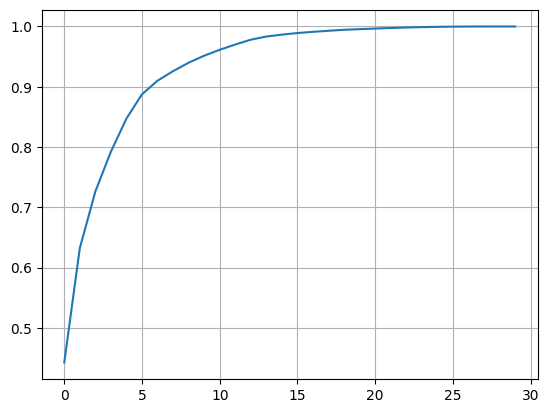

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.grid()
plt.show()

Ahora sí, calculamos PCA para 2 componentes y lo pintamos.

In [ ]:
pca = PCA(n_components=2)
pca.fit(datos)
datos_2d = pca.transform(datos)

Esta primera figura **No nos da mucha información**, no se ve a priori ningún grupo diferenciado en el dataset.

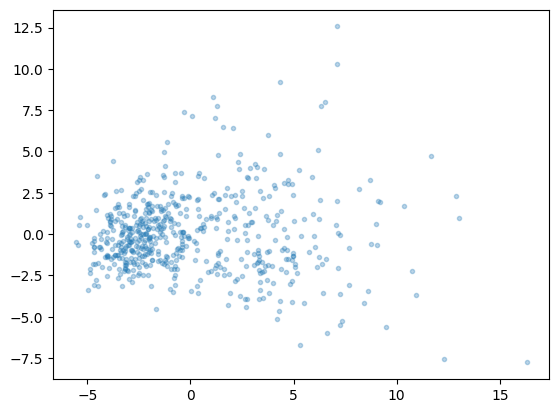

In [ ]:
plt.plot(datos_2d[:, 0], datos_2d[:, 1], '.', alpha=0.3)
plt.show()

Sin embargo, si incorporamos la información que nos proporciona K-Means, es decir, a qué cluster pertenece cada punto, podemos visualizar un poco mejor los datos.

- Hay grupos bien diferenciados (se ven claramente grupos de distinto color).

- Hay grupos que PCA no ha sido capaz de diferenciar, los agrupa todos en el mismo sitio pero K-Means es capaz de identificarlos.

- Hay grupos que en PCA están dispersados pero que K-Means los está reconociendo como cercanos.

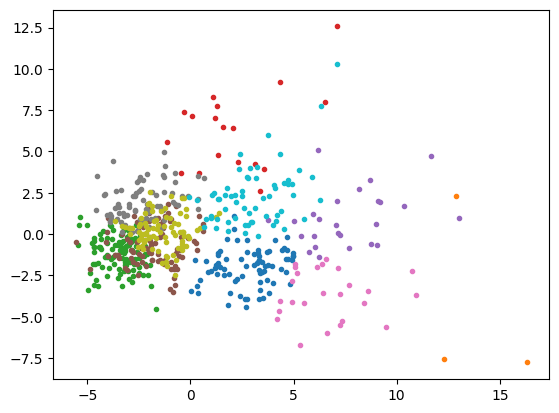

In [ ]:
for c in np.unique(clusters):
  plt.plot(datos_2d[clusters==c, 0], datos_2d[clusters==c, 1], '.')
plt.show()

## Visualización de la clusterización con árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=8)
tree.fit(datos, clusters)
tree.score(datos, clusters)

0.9718804920913884

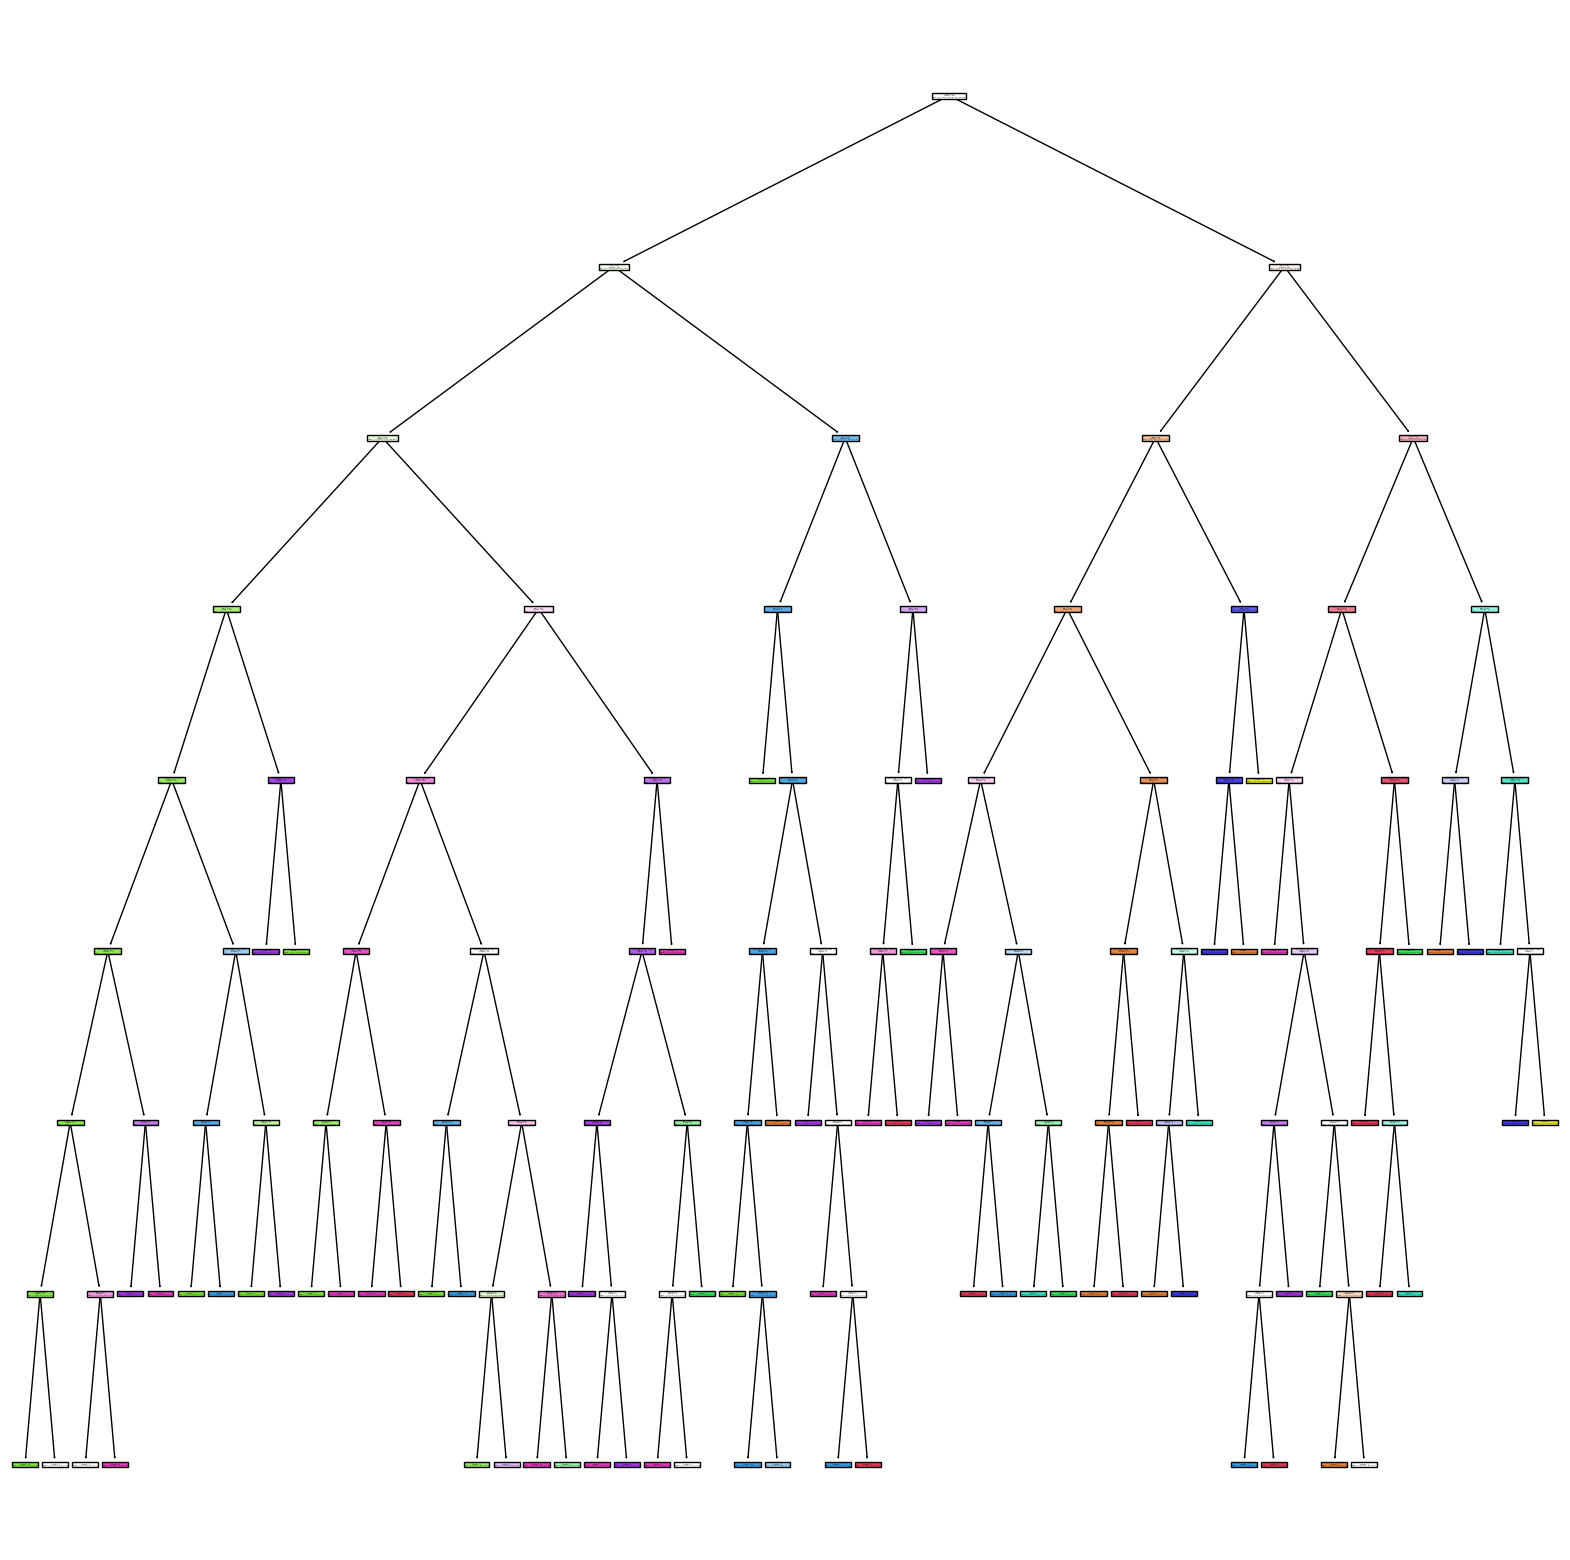

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(tree, filled=True, feature_names=breastCancer.feature_names)
plt.show()